In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('hnp_stats_csv/HNP_StatsData.csv')
df['Mean']=df.iloc[:,4:-1].mean(axis=1)
df=df[['Country Code', 'Indicator Name', 'Mean']]
countrycode = df['Country Code'].unique()

##cleaning the data to just look at the mean of the annual data on the different indicators for all countries
countrydf = []
for country in countrycode:
    tempdf = df[df['Country Code']==country]
    tempdf.set_index('Indicator Name', inplace=True)
    tempdf.drop('Country Code', axis=1, inplace=True)
    tempdf.columns=[country]
    tempdf=tempdf.transpose()
    countrydf.append(tempdf)

/Users/chuanfuyap/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
df2 = pd.concat(countrydf).fillna(0)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
PC = pca.fit_transform(df2)

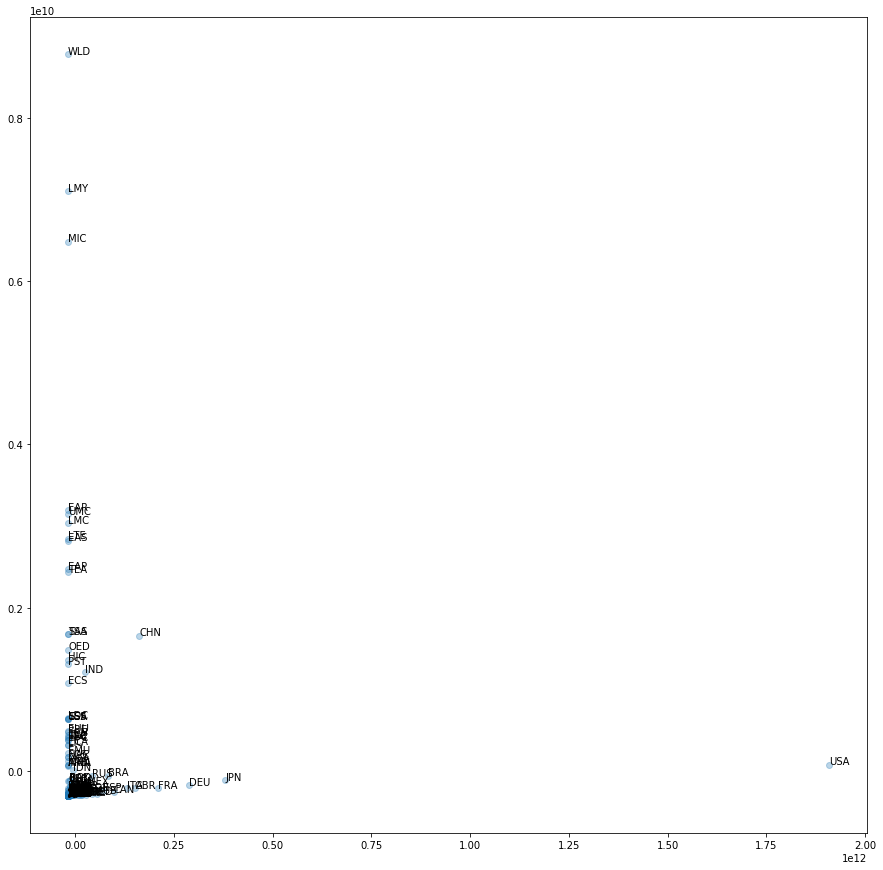

In [4]:
plt.figure(figsize=(15,15))
plt.scatter(PC[:,0], PC[:,1], alpha=0.3)
for i, txt in enumerate(df2.index):
    plt.annotate(txt, (PC[i,0],PC[i,1]))

Quick pca to try and quickly isolate countries, it seems many of them have missing data, save for USA, which is in its own corner. Whilst China, Japan, Germany, India and France are not in the cluster as well, though not as far off as USA. WLD, LMY and MIC in the data are countries but rather World, Low income and Middle income respectively.